## Import

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import skimage as ski

# Load images

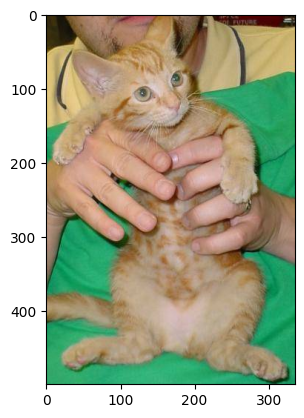

In [37]:
image = ski.io.imread("train/cat.1001.jpg")
plt.imshow(image)

Conversion en gris


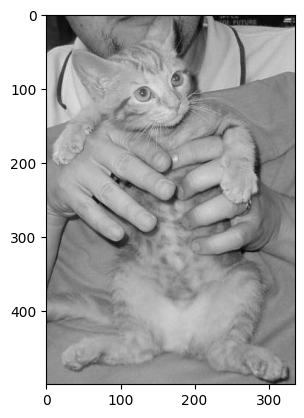

In [38]:
image_gris = ski.color.rgb2gray(image)
plt.imshow(image_gris, cmap="gray")

## Récupérer les dimensions de l'image pour les transformer en carré

In [39]:
height = image_gris.shape[0]
width = image_gris.shape[1]
"width", width,image_gris.shape[1], "height", height, image_gris.shape[0] ,  

('width', 336, 336, 'height', 499, 499)

Si la hauteur est plus grande que la largeur, nous voulons modifier la largeur, donc l'index 1. Sinon, nous voulons modifier la hauteur, donc l'index 0.

In [40]:
idx_to_pad = 1 if height > width else 0
other_idx = 1 - idx_to_pad
idx_to_pad, other_idx

(1, 0)

In [41]:
short_dim = image_gris.shape[idx_to_pad]
large_dim = image_gris.shape[other_idx]
"Short dim","height" if idx_to_pad == 0 else "widht", short_dim, "Large dim",large_dim

('Short dim', 'widht', 336, 'Large dim', 499)

Calculer la différence de pixels entre les deux.

In [42]:
total_pad_size = (large_dim - short_dim)
total_pad_size

163

In [43]:
pad_size_1 = total_pad_size//2
pad_size_2 = total_pad_size//2


if total_pad_size % 2 != 0:
    pad_size_2 += 1

pad_size_1, pad_size_2

(81, 82)

In [44]:
pad_width = [[0,0], [0,0]]
pad_width[idx_to_pad] = [pad_size_1, pad_size_2]

Ajoutez le padding calculé précédemment pour que l'image ait la même taille en hauteur et en largeur

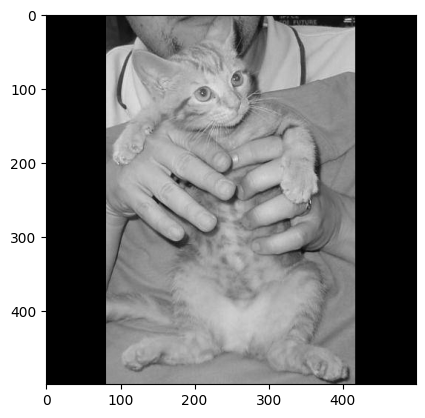

In [45]:
padded_image = np.pad(image_gris, pad_width, mode="constant")
plt.imshow(padded_image, cmap="gray")

Redimensionne l'image pour la mettre en 50 par 50 afin que toutes les images aient la même taille. On perd donc de la résolution

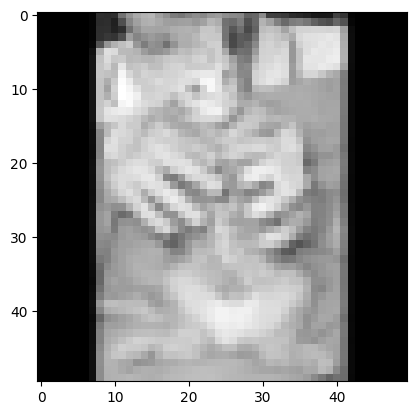

In [46]:
resized_image = ski.transform.resize(padded_image, (50, 50))
plt.imshow(resized_image, cmap="gray")